In [10]:
import pandas as pd
from datetime import datetime, timedelta

In [12]:
cesta_k_suboru1 = r'c:\Users\firda\OneDrive\Študijný materiál\VŠ\2024 LS 2.rocnik\NeuronoveSiete\Zadanie\PI_DataLink_Aglo_digital twins-5min-SP4-2018-15minute.xlsm'
nazov_listu1 = 'Sheet1'
data1 = pd.read_excel(cesta_k_suboru1, sheet_name=nazov_listu1)

data1 = data1.iloc[3:, 2:]
data1 = data1.reset_index(drop=True)
data1

,Unnamed: 2,Unnamed: 3,výstupné dáta,výstupné dáta.1,výstupné dáta.2,"výstupné dáta, látkové filtre - pred komínom","vstupné dáta, 3 stupen miesania, reguluje palič","vstupné dáta, reguluje palič","vstupné dáta, 3 stupeň","vstupné dáta, reguluje palič.1",...,Unnamed: 195,Unnamed: 196,Unnamed: 197,Unnamed: 198,Unnamed: 199,Unnamed: 200,Unnamed: 201,Unnamed: 202,Unnamed: 203,Unnamed: 204
0,2018-01-01 10:00:00,2018-01-01 10:30:00,18.279808,703.252156,24.328608,0,1,228.477436,0,3.779483,...,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found
1,2018-01-01 10:30:00,2018-01-01 11:00:00,18.11305,700.13979,26.645883,0,1,228.074851,0,3.779492,...,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found
2,2018-01-01 11:00:00,2018-01-01 11:30:00,18.280258,709.188462,26.889692,0,1,227.750251,0,3.770042,...,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found
3,2018-01-01 11:30:00,2018-01-01 12:00:00,18.2676,704.970265,25.165058,0,1,227.996559,0,3.775433,...,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found
4,2018-01-01 12:00:00,2018-01-01 12:30:00,18.28035,710.909716,24.855775,0,1,228.087685,0,3.7528,...,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17471,2018-12-31 09:30:00,2018-12-31 10:00:00,18.816999,705.377481,75.309609,0,1,228.062101,0,4.16295,...,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found
17472,2018-12-31 10:00:00,2018-12-31 10:30:00,18.816999,705.049167,89.836509,0,1,227.973419,0,4.168333,...,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found
17473,2018-12-31 10:30:00,2018-12-31 11:00:00,18.816999,707.584468,77.117459,0,1,227.797426,0,4.157475,...,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found
17474,2018-12-31 11:00:00,2018-12-31 11:30:00,18.816999,708.277203,81.320284,0,1,228.163453,0,4.150375,...,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found,Tag not found


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.utils.data import TensorDataset, DataLoader

c:\Users\firda\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [17]:
# Získanie indexu stĺpca 'vstupné dáta.3'
index_stlpca = data1.columns.get_loc('vstupné dáta.2')

# Odstránenie stĺpcov od stĺpca 'vstupné dáta.3' a riadkov po ňom
data = data1.iloc[:, :index_stlpca]


data = data.drop('Unnamed: 2', axis=1)
data = data.drop('Unnamed: 3', axis=1)
data = data.drop('výstupné dáta, látkové filtre - pred komínom', axis=1)
data = data.drop('vstupné dáta, 3 stupeň', axis=1)
data = data.drop('Unnamed: 12', axis=1)
data = data.drop('Unnamed: 13', axis=1)
data = data.drop('Unnamed: 14', axis=1)
data = data.drop('Unnamed: 16', axis=1)
data = data.drop('výstupné dáta.3', axis=1)
data = data.drop('výstupné dáta.4', axis=1)
data = data.drop('Unnamed: 27', axis=1)
#data = data.drop('výstupné dáta.5', axis=1)
data = data.drop('Unnamed: 30', axis=1)
#No Good Data For Calculation
data = data.drop('vstupné dáta, 3 stupen miesania, reguluje palič', axis=1)
data = data.drop('vstupné dáta, reguluje palič.2', axis=1)
data = data.drop('vstupné dáta', axis=1)
data = data.drop('vstupné dáta, reguluje palič.10', axis=1)

# Vypísanie upravených dát
data

,výstupné dáta,výstupné dáta.1,výstupné dáta.2,"vstupné dáta, reguluje palič","vstupné dáta, reguluje palič.1","vstupné dáta, reguluje palič.3","vstupné dáta, reguluje palič.4","vstupné dáta, reguluje palič.5","vstupné dáta, reguluje palič.6","vstupné dáta, reguluje palič.7",...,výstupné dáta.8,výstupné dáta.9,výstupné dáta.10,výstupné dáta.11,výstupné dáta.12,výstupné dáta.13,výstupné dáta.14,výstupné dáta.15,vstupné dáta.1,"vstupné dáta, reguluje palič.12"
0,18.279808,703.252156,24.328608,228.477436,3.779483,3.22,-4.313583,-4.316767,-5.127675,-4.387867,...,140.072683,131.876908,166.821242,175.863916,181.072325,199.353868,165.925166,115.124108,0.755392,2.002942
1,18.11305,700.13979,26.645883,228.074851,3.779492,3.22,-4.316142,-4.303767,-5.10665,-4.376208,...,124.651984,117.038342,159.061707,171.253558,181.738807,202.657243,167.574825,118.285308,0.740342,1.9833
2,18.280258,709.188462,26.889692,227.750251,3.770042,3.22,-4.16,-4.13675,-4.945667,-4.244733,...,124.524768,115.315375,162.086675,160.254149,193.0663,217.129942,191.433066,127.390316,0.737,1.974083
3,18.2676,704.970265,25.165058,227.996559,3.775433,3.22,-4.191742,-4.174617,-4.972683,-4.253458,...,120.230441,107.663042,155.757768,154.614825,183.914683,212.790476,188.9894,128.269024,0.730508,1.9576
4,18.28035,710.909716,24.855775,228.087685,3.7528,3.22,-4.08915,-4.063367,-4.871258,-4.135233,...,123.847326,111.292667,152.090241,146.857391,176.738442,203.662459,183.656509,127.13895,0.730458,1.95075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17471,18.816999,705.377481,75.309609,228.062101,4.16295,3.53,-3.860658,-4.832058,-5.604483,-4.973208,...,98.820033,119.300874,119.8567,118.36125,106.9638,157.149584,179.884384,151.258817,0.7125,2.04165
17472,18.816999,705.049167,89.836509,227.973419,4.168333,3.53,-3.812375,-4.79335,-5.589908,-4.9491,...,103.994658,125.246243,122.319942,119.65615,110.222717,158.241693,182.536584,154.473742,0.711358,2.036742
17473,18.816999,707.584468,77.117459,227.797426,4.157475,3.53,-3.721008,-4.642475,-5.405375,-4.787342,...,111.492883,133.400609,130.402317,132.115683,120.702633,172.917275,194.002358,161.987158,0.711575,2.03715
17474,18.816999,708.277203,81.320284,228.163453,4.150375,3.53,-3.688233,-4.610583,-5.381467,-4.727975,...,112.281008,141.0531,137.857433,138.726817,127.203275,173.819849,186.804325,152.606066,0.71135,2.037417


In [19]:
cesta_k_suboru_vystup = 'data.xlsx'
data.to_excel(cesta_k_suboru_vystup, index=False)

In [29]:
data_numeric = data.apply(pd.to_numeric, errors='coerce').dropna()

X = data_numeric.drop(columns=["výstupné dáta.5"])
y = data_numeric["výstupné dáta.5"]

#y_original = y.values.reshape(-1, 1)
scaler = StandardScaler()
#X = (X - X.mean()) / X.std()
X_scaled = scaler.fit_transform(X)

#scaler_y = MinMaxScaler()
#y_scaled = scaler_y.fit_transform(y_original)

# Splitting the dataset into training, testing, and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=1234, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=1234, shuffle=True)

y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

X_train = torch.tensor(X_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32) 
y_val = torch.tensor(y_val, dtype=torch.float32) 
y_test = torch.tensor(y_test, dtype=torch.float32)

train = TensorDataset(X_train, y_train)
test = TensorDataset(X_test, y_test)
val = TensorDataset(X_val, y_val)

# Vytvorenie dataloaders pre trénovaciu a testovaciu sadu
train_loader = DataLoader(train, batch_size=64, shuffle=False)
test_loader = DataLoader(test, batch_size=64, shuffle=False)
validation_loader = DataLoader(val, batch_size=64, shuffle=False)

AttributeError: 'Tensor' object has no attribute 'apply'

In [56]:
data_numeric

,výstupné dáta,výstupné dáta.1,výstupné dáta.2,"vstupné dáta, reguluje palič","vstupné dáta, reguluje palič.1","vstupné dáta, reguluje palič.3","vstupné dáta, reguluje palič.4","vstupné dáta, reguluje palič.5","vstupné dáta, reguluje palič.6","vstupné dáta, reguluje palič.7",...,výstupné dáta.8,výstupné dáta.9,výstupné dáta.10,výstupné dáta.11,výstupné dáta.12,výstupné dáta.13,výstupné dáta.14,výstupné dáta.15,vstupné dáta.1,"vstupné dáta, reguluje palič.12"
0,18.279808,703.252156,24.328608,228.477436,3.779483,3.22,-4.313583,-4.316767,-5.127675,-4.387867,...,140.072683,131.876908,166.821242,175.863916,181.072325,199.353868,165.925166,115.124108,0.755392,2.002942
1,18.113050,700.139790,26.645883,228.074851,3.779492,3.22,-4.316142,-4.303767,-5.106650,-4.376208,...,124.651984,117.038342,159.061707,171.253558,181.738807,202.657243,167.574825,118.285308,0.740342,1.983300
2,18.280258,709.188462,26.889692,227.750251,3.770042,3.22,-4.160000,-4.136750,-4.945667,-4.244733,...,124.524768,115.315375,162.086675,160.254149,193.066300,217.129942,191.433066,127.390316,0.737000,1.974083
3,18.267600,704.970265,25.165058,227.996559,3.775433,3.22,-4.191742,-4.174617,-4.972683,-4.253458,...,120.230441,107.663042,155.757768,154.614825,183.914683,212.790476,188.989400,128.269024,0.730508,1.957600
4,18.280350,710.909716,24.855775,228.087685,3.752800,3.22,-4.089150,-4.063367,-4.871258,-4.135233,...,123.847326,111.292667,152.090241,146.857391,176.738442,203.662459,183.656509,127.138950,0.730458,1.950750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17471,18.816999,705.377481,75.309609,228.062101,4.162950,3.53,-3.860658,-4.832058,-5.604483,-4.973208,...,98.820033,119.300874,119.856700,118.361250,106.963800,157.149584,179.884384,151.258817,0.712500,2.041650
17472,18.816999,705.049167,89.836509,227.973419,4.168333,3.53,-3.812375,-4.793350,-5.589908,-4.949100,...,103.994658,125.246243,122.319942,119.656150,110.222717,158.241693,182.536584,154.473742,0.711358,2.036742
17473,18.816999,707.584468,77.117459,227.797426,4.157475,3.53,-3.721008,-4.642475,-5.405375,-4.787342,...,111.492883,133.400609,130.402317,132.115683,120.702633,172.917275,194.002358,161.987158,0.711575,2.037150
17474,18.816999,708.277203,81.320284,228.163453,4.150375,3.53,-3.688233,-4.610583,-5.381467,-4.727975,...,112.281008,141.053100,137.857433,138.726817,127.203275,173.819849,186.804325,152.606066,0.711350,2.037417


In [30]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

(torch.Size([12048, 25]),
 torch.Size([12048]),
 torch.Size([2582, 25]),
 torch.Size([2582]))

In [79]:
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, dropout):
        super(LSTMModel, self).__init__()
        self.hidden_dim = hidden_dim 
        self.layer_dim = layer_dim 
        self.lstm = nn.LSTM(input_dim, hidden_dim, layer_dim, dropout = 0.3, batch_first=True)

        self.fc = nn.Linear(hidden_dim, 32)  
        self.fc1 = nn.Linear(32, 1)  
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()
        c0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()

         # Forward propagation through LSTM layer
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        out = self.dropout(out)
        # Index hidden state of last time step
        out = nn.functional.relu(self.fc(out[:, -1, :]))
        #out = out[:, -1, :]
        out = self.dropout(out)
        #out = self.fc(out)
        #out = self.dropout(out)
        out = self.fc1(out)
        return out


In [80]:
num_epochs = 100
input_dim = len(X.columns) 
hidden_dim = 100
layer_dim = 3

model = LSTMModel(input_dim, hidden_dim, layer_dim, dropout=0.2)

error = nn.MSELoss()
learning_rate = 0.01
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [81]:
loss_list = []
iteration_list = []
validation_loss_list = [] 
iterations = 0
for epoch in range(num_epochs):
    model.train() 
    for i, (data, labels) in enumerate(train_loader):
       
        data = data.view(-1, 1, input_dim).requires_grad_()
        
        optimizer.zero_grad()
        
        outputs = model(data)
        
        loss = error(outputs.squeeze(), labels)
        
        loss.backward()
        
        optimizer.step()
        iterations += 1

        
        if iterations % 100 == 0:
            loss_list.append(loss.item())
            iteration_list.append(iterations)

            # Výpis straty
            print('Iteration: {}. Loss: {}'.format(iterations, loss.item()))

            model.eval()  
            validation_loss = 0.0
            for data_val, labels_val in validation_loader:
                data_val = data_val.view(-1, 1, input_dim)
                outputs_val = model(data_val)
                loss_val = error(outputs_val.squeeze(), labels_val)
                validation_loss += loss_val.item() * data_val.size(0)  

            validation_loss /= len(validation_loader.dataset)  
            validation_loss_list.append(validation_loss)
            print('Validation Loss: {}'.format(validation_loss))

Iteration: 100. Loss: 9.622861862182617
Validation Loss: 8.53136065096748
Iteration: 200. Loss: 12.877180099487305
Validation Loss: 8.466861396127667
Iteration: 300. Loss: 4.667876243591309
Validation Loss: 7.0898974691593395
Iteration: 400. Loss: 9.931422233581543
Validation Loss: 7.3886655396403125
Iteration: 500. Loss: 3.7697715759277344
Validation Loss: 6.596242860155822
Iteration: 600. Loss: 10.439992904663086
Validation Loss: 7.094195190462191
Iteration: 700. Loss: 5.446975231170654
Validation Loss: 6.773360886562711
Iteration: 800. Loss: 10.604280471801758
Validation Loss: 7.209354006902457
Iteration: 900. Loss: 3.179105043411255
Validation Loss: 5.7759553730533995
Iteration: 1000. Loss: 9.029228210449219
Validation Loss: 7.252461178186418
Iteration: 1100. Loss: 4.0631866455078125
Validation Loss: 5.3833319038314285
Iteration: 1200. Loss: 8.375216484069824
Validation Loss: 6.350056878731843
Iteration: 1300. Loss: 5.9584174156188965
Validation Loss: 5.404588914674719
Iteration: 1

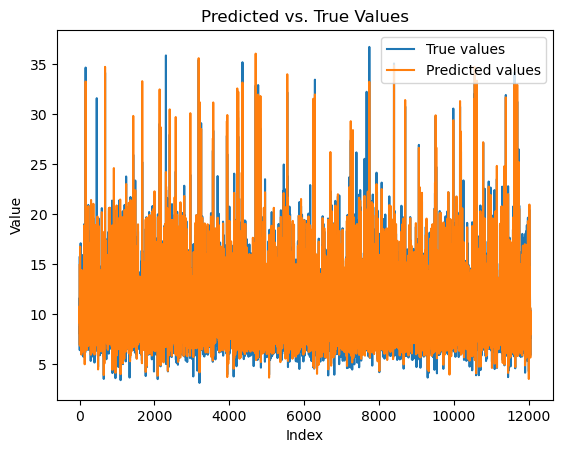

In [82]:
model.eval()

# Predikcia hodnôt pre testovaciu sadu
predicted_values = []
true_values = []

with torch.no_grad():
    for data, labels in train_loader:
        data = data.view(-1, 1, 25)
        outputs = model(data)
        predicted_values.extend(outputs.cpu().numpy())
        true_values.extend(labels.cpu().numpy())

# Vykreslenie grafu predikovaných a skutočných hodnôt
plt.plot(true_values, label="True values")
plt.plot(predicted_values, label="Predicted values")
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Predicted vs. True Values")
plt.legend()
plt.show()

In [83]:
model.eval()

# Predikcia na testovacej sade
with torch.no_grad():
    for data, labels in train_loader:
        # Predikcia
        outputs = model(data.view(-1, 1, input_dim))
        
        # Vypísanie predikovaných a skutočných hodnôt
        for i in range(len(outputs)):
            print("Predikovaná hodnota:", outputs[i].item(), "| Skutočná hodnota:", labels[i].item())

Predikovaná hodnota: 10.608928680419922 | Skutočná hodnota: 11.557036399841309
Predikovaná hodnota: 9.501741409301758 | Skutočná hodnota: 8.487845420837402
Predikovaná hodnota: 9.125194549560547 | Skutočná hodnota: 9.118720054626465
Predikovaná hodnota: 10.814981460571289 | Skutočná hodnota: 9.41268539428711
Predikovaná hodnota: 9.280407905578613 | Skutočná hodnota: 7.446201324462891
Predikovaná hodnota: 6.891485214233398 | Skutočná hodnota: 6.40716028213501
Predikovaná hodnota: 15.017087936401367 | Skutočná hodnota: 15.780462265014648
Predikovaná hodnota: 8.862991333007812 | Skutočná hodnota: 8.22300910949707
Predikovaná hodnota: 10.183244705200195 | Skutočná hodnota: 8.225334167480469
Predikovaná hodnota: 9.664749145507812 | Skutočná hodnota: 8.013226509094238
Predikovaná hodnota: 9.144292831420898 | Skutočná hodnota: 8.79745101928711
Predikovaná hodnota: 7.89713191986084 | Skutočná hodnota: 6.935571193695068
Predikovaná hodnota: 11.82037353515625 | Skutočná hodnota: 13.0837783813476

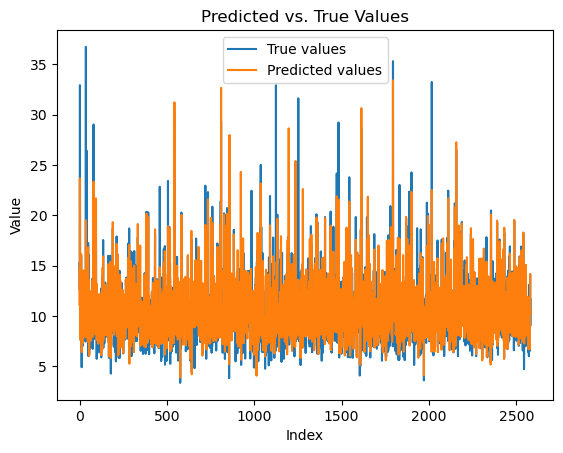

In [84]:
model.eval()

# Predikcia hodnôt pre testovaciu sadu
predicted_values = []
true_values = []

with torch.no_grad():
    for data, labels in test_loader:
        data = data.view(-1, 1, input_dim)
        outputs = model(data)
        predicted_values.extend(outputs.cpu().numpy())
        true_values.extend(labels.cpu().numpy())

# Vykreslenie grafu predikovaných a skutočných hodnôt
plt.plot(true_values, label="True values")
plt.plot(predicted_values, label="Predicted values")
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Predicted vs. True Values")
plt.legend()
plt.show()

In [85]:
model.eval()

# Predikcia na testovacej sade
with torch.no_grad():
    for data, labels in test_loader:
        # Predikcia
        outputs = model(data.view(-1, 1, input_dim))
        
        # Vypísanie predikovaných a skutočných hodnôt
        for i in range(len(outputs)):
            print("Predikovaná hodnota:", outputs[i].item(), "| Skutočná hodnota:", labels[i].item())

Predikovaná hodnota: 14.645776748657227 | Skutočná hodnota: 15.269671440124512
Predikovaná hodnota: 11.040504455566406 | Skutočná hodnota: 12.632516860961914
Predikovaná hodnota: 23.662925720214844 | Skutočná hodnota: 32.930145263671875
Predikovaná hodnota: 13.079343795776367 | Skutočná hodnota: 13.3361177444458
Predikovaná hodnota: 9.653297424316406 | Skutočná hodnota: 8.244709968566895
Predikovaná hodnota: 7.69617223739624 | Skutočná hodnota: 7.719390869140625
Predikovaná hodnota: 15.213653564453125 | Skutočná hodnota: 14.624387741088867
Predikovaná hodnota: 8.805521011352539 | Skutočná hodnota: 7.539601802825928
Predikovaná hodnota: 8.024667739868164 | Skutočná hodnota: 7.677444934844971
Predikovaná hodnota: 16.140615463256836 | Skutočná hodnota: 16.001609802246094
Predikovaná hodnota: 8.891222953796387 | Skutočná hodnota: 8.949400901794434
Predikovaná hodnota: 8.024940490722656 | Skutočná hodnota: 8.108771324157715
Predikovaná hodnota: 6.388298034667969 | Skutočná hodnota: 4.888789